# Load Data

In [452]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dji.csv', header=1, usecols=[1,2,3,4])

df.head()

,Date,Dow Jones value,RIS Forecast Volume,RIS Actual Volume
0,1/4/2016,17148.94,6547,6886
1,1/5/2016,17158.66,4328,4928
2,1/6/2016,16906.51,3987,3713
3,1/7/2016,16514.10,4006,3910
4,1/8/2016,16346.45,4107,3797


# Process Data

In [453]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].describe()

count                    1160
unique                   1160
top       2016-09-08 00:00:00
freq                        1
first     2016-01-04 00:00:00
last      2020-08-13 00:00:00
Name: Date, dtype: object

# Create Training Data and Fit Model

In [454]:
df = df[['Date','RIS Actual Volume']]

#  pre-format for prophet
df.columns = ['ds','y']

# set start date of training data
df = df[df['ds'] >= '2018-07-01']
df.head()

,ds,y
628,2018-07-02,2890
629,2018-07-03,2190
630,2018-07-05,2460
631,2018-07-06,2440
632,2018-07-09,3225


In [455]:
# create default prophet model
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Create future dates

In [456]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
892,2021-08-09
893,2021-08-10
894,2021-08-11
895,2021-08-12
896,2021-08-13


# Make Predicitons on future dates

In [457]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
892,2021-08-09,2745.875843,2247.216509,3219.332303
893,2021-08-10,2192.558313,1753.302817,2678.515683
894,2021-08-11,1989.992547,1503.748801,2459.122110
895,2021-08-12,1892.384862,1415.235948,2374.339336
896,2021-08-13,1976.016948,1491.792565,2457.467693


# Visualize Data

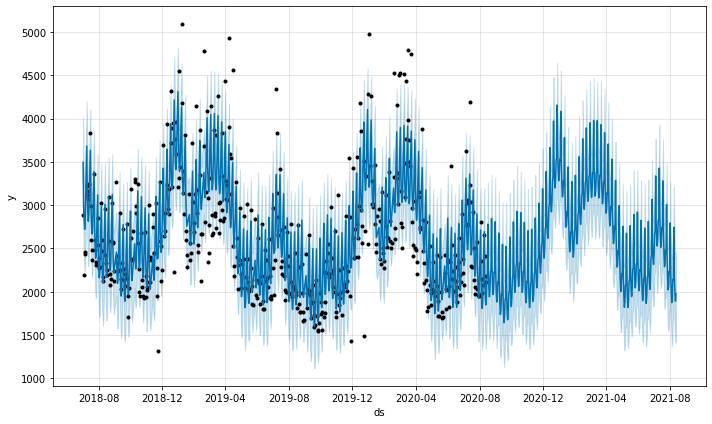

In [458]:
fig1 = m.plot(forecast)

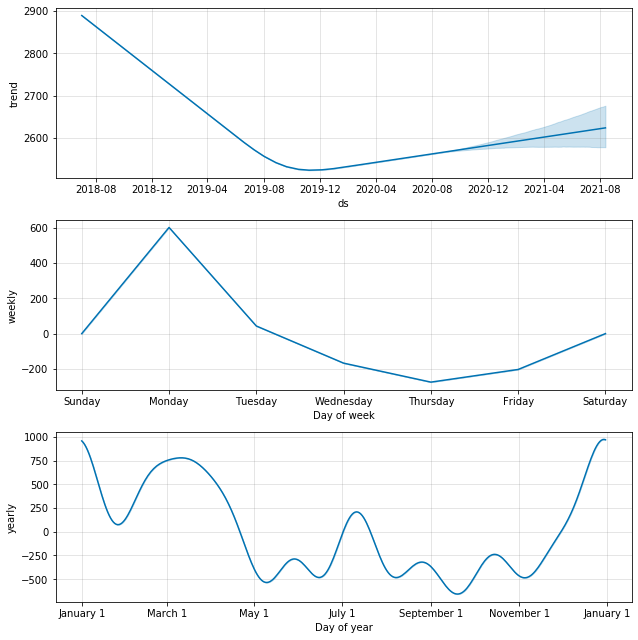

In [459]:
fig2 = m.plot_components(forecast)

# Calculate MAPE for original model and prophet 
from dates 2020-8-14 through 2020-8-19

In [460]:
f = forecast[(forecast['ds']>='2020-08-14') & (forecast['ds']<'2020-08-20')][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# get rid of predictions on the weekends
f = f[(f['ds'] != '2020-08-15') & (f['ds'] != '2020-08-16')]

# get actual recent
f['actual'] = [1992,2690,2189,2196]

f['forecast'] = [1962,2844,2343,2137]

'prophet',abs((f['yhat']-f['actual'])/f['actual']).mean(), 'current model',abs((f['forecast'] - f['actual'])/f['actual']).mean()

('prophet', 0.03922814186119733, 'current model', 0.042382025338796786)

In [461]:
# Create display dataframe for results
d = f[['ds','yhat','actual','forecast']].copy()
d['yhat'] = d['yhat'].round()
d.columns = ['date', 'prediction', 'actual', 'forecast']
d

,date,prediction,actual,forecast
532,2020-08-14,1933.0,1992,1962
535,2020-08-17,2781.0,2690,2844
536,2020-08-18,2235.0,2189,2343
537,2020-08-19,2037.0,2196,2137
